![image info](https://ineuron.ai/images/ineuron-logo.png)

### Missing values approaches

* Check for Missing data
* Drop NA Values
* MEAN/MEDAIN Imputation
* Random sample imputation

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv('google_cleaned.csv')

**Show Top 5 Records**

In [4]:
#sample of the data(random_sample)
df.sample(10)

App            Category  Rating  \
10017             TMJ4.com - WTMJ-TV Milwaukee  NEWS_AND_MAGAZINES     3.8   
5030                             AE Air Hockey              SPORTS     3.8   
1034                                   FM News              EVENTS     NaN   
8022                         Morse Code Reader       COMMUNICATION     3.9   
2817                    Waterfall Photo Frames         PHOTOGRAPHY     4.5   
7631   AppClose - The #1 FREE Co-Parenting App           PARENTING     3.5   
642                             Toronto Dating              DATING     NaN   
7985     Resume Maker / CV creator & Templates               TOOLS     4.2   
478                          Truth or Dare Pro              DATING     NaN   
8361                                 DG Coupon            SHOPPING     3.7   

       Reviews   Size  Installs  Type  Price Content Rating            Genres  \
10017      728    NaN     50000  Free   0.00   Everyone 10+  News & Magazines   
5030       926   7.60     50000  Free   0.00       Everyone            Sports   
1034        46   3.60      5000  Free   0.00       Everyone            Events   
8022      1436   0.02    100000  Free   0.00       Everyone     Communication   
2817     10349  11.00   1000000  Free   0.00       Everyone       Photography   
7631       159  85.00     10000  Free   0.00       Everyone         Parenting   
642          0  14.00       100  Free   0.00     Mature 17+            Dating   
7985        54  22.00      5000  Free   0.00       Everyone             Tools   
478          0  20.00        50  Paid   1.49           Teen            Dating   
8361       668   1.10    100000  Free   0.00       Everyone          Shopping   

      Last Updated         Current Ver         Android Ver  day  month  year  
10017   2018-07-05  Varies with device  Varies with device    5      7  2018  
5030    2013-08-01               1.0.0          2.2 and up    1      8  2013  
1034    2018-07-04                 1.4          4.2 and up    4      7  2018  
8022    2013-08-26                 1.0          1.6 and up   26      8  2013  
2817    2017-07-29               1.6.0          2.3 and up   29      7  2017  
7631    2018-07-31              2.1.23          4.4 and up   31      7  2018  
642     2018-07-12                 1.0          4.1 and up   12      7  2018  
7985    2018-04-15               1.0.6        4.0.3 and up   15      4  2018  
478     2017-09-01                 1.0          4.0 and up    1      9  2017  
8361    2018-07-16                20.0          4.0 and up   16      7  2018

### 1. Check for Missing data

In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [6]:
df.isna().sum().sort_values(ascending=False) 

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
day                  0
month                0
year                 0
dtype: int64

In [7]:
df.shape[0] 

10840

In [8]:
(1695/10840)*100

15.636531365313653

In [9]:
* (100)

SyntaxError: can't use starred expression here (<ipython-input-9-1067c513cd70>, line 4)

In [10]:
null_df = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null_df

Null Values  Percentage Null Values
Size                   1695               15.636531
Rating                 1474               13.597786
Current Ver               8                0.073801
Android Ver               2                0.018450
Type                      1                0.009225
App                       0                0.000000
Category                  0                0.000000
Reviews                   0                0.000000
Installs                  0                0.000000
Price                     0                0.000000
Content Rating            0                0.000000
Genres                    0                0.000000
Last Updated              0                0.000000
day                       0                0.000000
month                     0                0.000000
year                      0                0.000000

In [11]:
#plotting the num value counts

In [12]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)

In [13]:
null_counts

Size              0.156365
Rating            0.135978
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
day               0.000000
month             0.000000
year              0.000000
dtype: float64

In [14]:
len(null_counts)

16

In [15]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
np.arange(len(null_counts))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

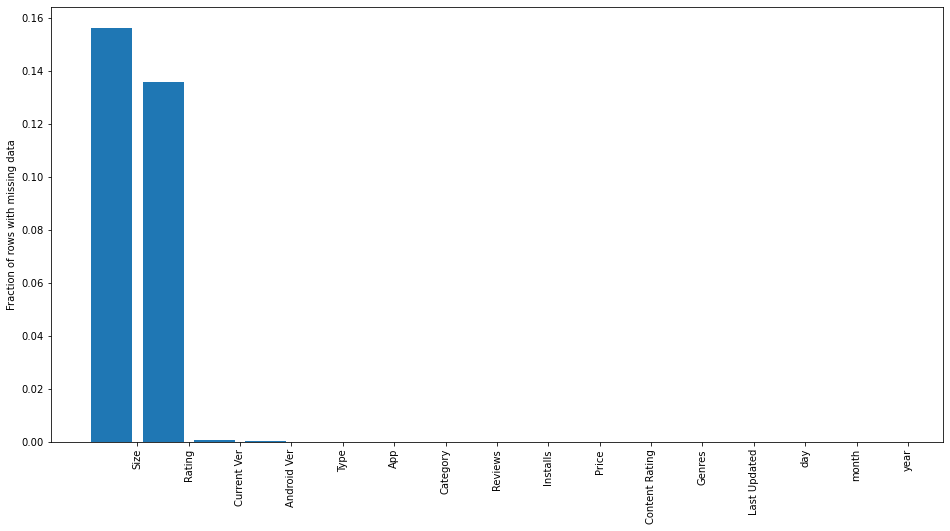

In [17]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

### 2. Drop NA Values

In [18]:
#this is best practice to create a copy of the data

In [19]:
df_copy = df.copy()

In [20]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [21]:
df_copy["Size"].isnull().sum()

1695

In [22]:
df_copy["Size"].isnull().mean()*100

15.636531365313653

In [23]:
df_copy["Price"].isnull().mean()*100

0.0

In [24]:
if df_copy["Size"].isnull().sum():
    print("yes")
else:
    print("no")

yes


In [25]:
if df_copy["Price"].isnull().mean()*100:
    print("yes")
else:
    print("no")

no


In [26]:
False+True

1

## dropping missing values

In [27]:
df.shape

(10840, 16)

In [28]:
drop_df.shape

NameError: name 'drop_df' is not defined

In [29]:
10840-7723

3117

In [30]:
drop_df = df_copy[cols].dropna()
drop_df

Rating    Size  Type         Current Ver         Android Ver
0         4.1  19.000  Free               1.0.0        4.0.3 and up
1         3.9  14.000  Free               2.0.0        4.0.3 and up
2         4.7   8.700  Free               1.2.4        4.0.3 and up
3         4.5  25.000  Free  Varies with device          4.2 and up
4         4.3   2.800  Free                 1.1          4.4 and up
...       ...     ...   ...                 ...                 ...
10832     4.8   0.619  Free                 0.8          2.2 and up
10833     4.0   2.600  Free               1.0.0          4.1 and up
10835     4.5  53.000  Free                1.48          4.1 and up
10836     5.0   3.600  Free                 1.0          4.1 and up
10839     4.5  19.000  Free  Varies with device  Varies with device

[7723 rows x 5 columns]

In [31]:
df_copy.shape, drop_df.shape

((10840, 16), (7723, 5))

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

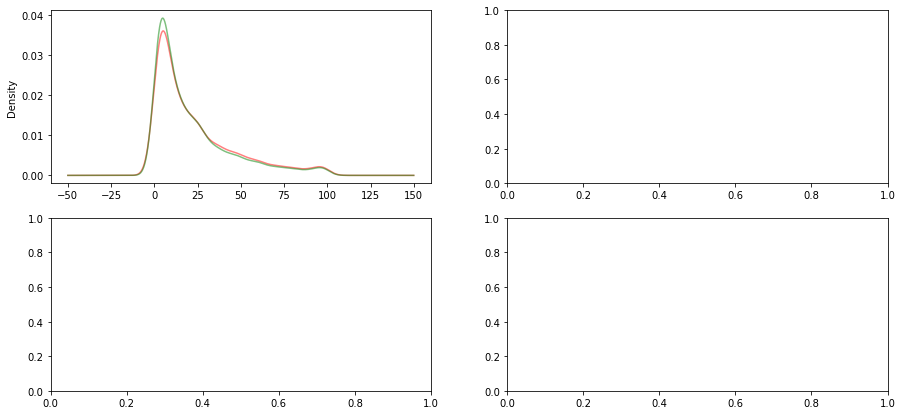

In [32]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')

<Figure size 432x288 with 0 Axes>

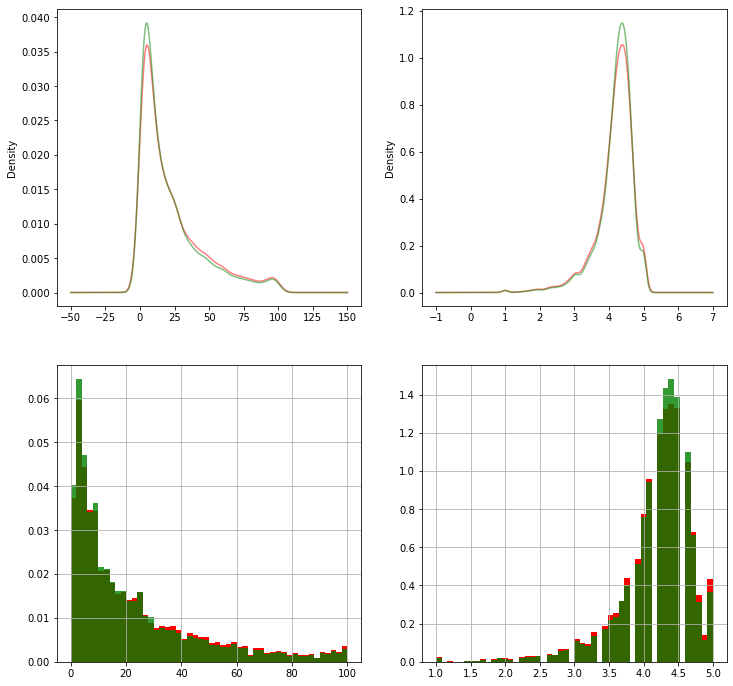

In [33]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

drop_df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
drop_df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
drop_df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
drop_df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

#### Insights
-As we can observe from above plots
- Drop NA Technique is changing our distribution pattern
- So we reject Drop NA Technique

### 3. MEAN/MEDAIN Imputation

In [34]:
df_copy_me_mo = df.copy()

In [35]:
df_copy_me_mo[df_copy_me_mo.isnull()]

App Category  Rating  Reviews  Size  Installs Type  Price  \
0      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
1      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
2      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
3      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
4      NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
...    ...      ...     ...      ...   ...       ...  ...    ...   
10835  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10836  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10837  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10838  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   
10839  NaN      NaN     NaN      NaN   NaN       NaN  NaN    NaN   

      Content Rating Genres Last Updated Current Ver Android Ver  day  month  \
0                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
1                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
2                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
3                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
4                NaN    NaN          NaN         NaN         NaN  NaN    NaN   
...              ...    ...          ...         ...         ...  ...    ...   
10835            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10836            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10837            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10838            NaN    NaN          NaN         NaN         NaN  NaN    NaN   
10839            NaN    NaN          NaN         NaN         NaN  NaN    NaN   

       year  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
10835   NaN  
10836   NaN  
10837   NaN  
10838   NaN  
10839   NaN  

[10840 rows x 16 columns]

In [36]:
df_copy_me_mo[df_copy_me_mo['Size'].isnull()]


App             Category  \
37                                    Floor Plan Creator       ART_AND_DESIGN   
42                            Textgram - write on photos       ART_AND_DESIGN   
52                         Used Cars and Trucks for Sale    AUTO_AND_VEHICLES   
67                                    Ulysse Speedometer    AUTO_AND_VEHICLES   
68                                                REPUVE    AUTO_AND_VEHICLES   
...                                                  ...                  ...   
10712  My Earthquake Alerts - US & Worldwide Earthquakes              WEATHER   
10724                                          Posta App  MAPS_AND_NAVIGATION   
10764                    Chat For Strangers - Video Chat               SOCIAL   
10825          Frim: get new friends on local chat rooms               SOCIAL   
10838                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
37        4.1    36639   NaN   5000000  Free    0.0       Everyone   
42        4.4   295221   NaN  10000000  Free    0.0       Everyone   
52        4.6    17057   NaN   1000000  Free    0.0       Everyone   
67        4.3    40211   NaN   5000000  Free    0.0       Everyone   
68        3.9      356   NaN    100000  Free    0.0       Everyone   
...       ...      ...   ...       ...   ...    ...            ...   
10712     4.4     3471   NaN    100000  Free    0.0       Everyone   
10724     3.6        8   NaN      1000  Free    0.0       Everyone   
10764     3.4      622   NaN    100000  Free    0.0     Mature 17+   
10825     4.0    88486   NaN   5000000  Free    0.0     Mature 17+   
10838     4.5      114   NaN      1000  Free    0.0     Mature 17+   

                  Genres Last Updated         Current Ver         Android Ver  \
37          Art & Design   2018-07-14  Varies with device        2.3.3 and up   
42          Art & Design   2018-07-30  Varies with device  Varies with device   
52       Auto & Vehicles   2018-07-30  Varies with device  Varies with device   
67       Auto & Vehicles   2018-07-30  Varies with device  Varies with device   
68       Auto & Vehicles   2018-05-25  Varies with device  Varies with device   
...                  ...          ...                 ...                 ...   
10712            Weather   2018-07-24  Varies with device  Varies with device   
10724  Maps & Navigation   2017-09-27  Varies with device          4.4 and up   
10764             Social   2018-05-23  Varies with device  Varies with device   
10825             Social   2018-03-23  Varies with device  Varies with device   
10838  Books & Reference   2015-01-19  Varies with device  Varies with device   

       day  month  year  
37      14      7  2018  
42      30      7  2018  
52      30      7  2018  
67      30      7  2018  
68      25      5  2018  
...    ...    ...   ...  
10712   24      7  2018  
10724   27      9  2017  
10764   23      5  2018  
10825   23      3  2018  
10838   19      1  2015  

[1695 rows x 16 columns]

In [37]:
df_copy_me_mo['Size'].mean()

21.506534062329052

In [38]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())

In [39]:
df_copy_me_mo['mean_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())
df_copy_me_mo['median_Size'] = df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median())
df_copy_me_mo['mean_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].mean())
df_copy_me_mo['median_Rating'] = df_copy_me_mo['Rating'].fillna(df_copy_me_mo['Rating'].median())

In [40]:
print('Original Size Variance', df_copy_me_mo['Size'].var())

Original Size Variance 510.5801557864865


In [41]:
print('Size Variance After mean imputation', df_copy_me_mo['mean_Size'].var())

Size Variance After mean imputation 430.7357638630519


In [42]:
print('Size Variance After median imputation', df_copy_me_mo['median_Size'].var())

Size Variance After median imputation 440.28217654605237


## mean will be a good option, as less variance


In [43]:
print('Original Rating Variance', df_copy_me_mo['Rating'].var())
print('Rating Variance After mean imputation', df_copy_me_mo['mean_Rating'].var())
print('Rating Variance After median imputation', df_copy_me_mo['median_Rating'].var())

Original Rating Variance 0.26545047227541496
Rating Variance After mean imputation 0.22935175503821595
Rating Variance After median imputation 0.23072842363353122


#### Insights
- As we can observe Variance is distorted after both mean and median imputation

<AxesSubplot:ylabel='Density'>

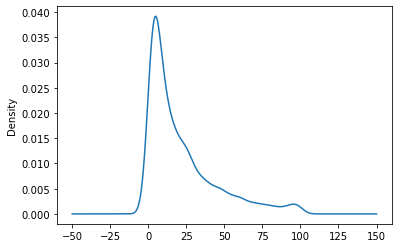

In [44]:
df_copy_me_mo['Size'].plot.density()

<AxesSubplot:ylabel='Density'>

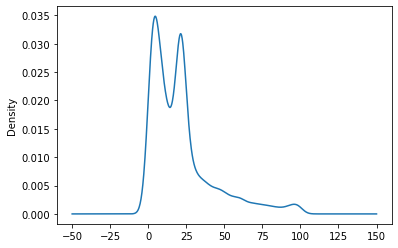

In [45]:
df_copy_me_mo['mean_Size'].plot.density()

<AxesSubplot:ylabel='Density'>

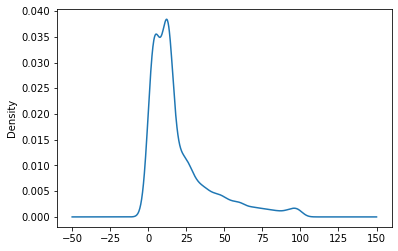

In [46]:
df_copy_me_mo['median_Size'].plot.density()

<Figure size 432x288 with 0 Axes>

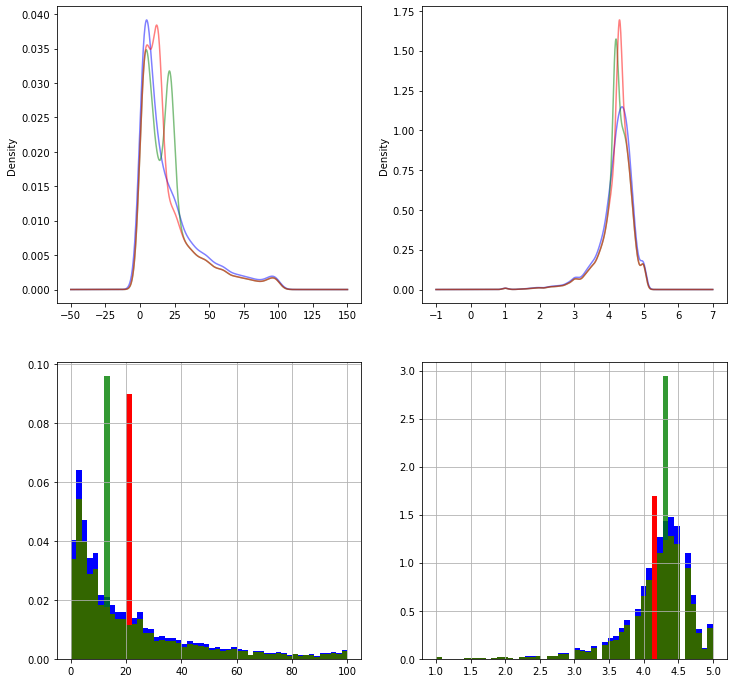

In [48]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df_copy_me_mo['Size'].plot.density(color='blue',ax=axs[0, 0],alpha=0.5,label='Size')
df_copy_me_mo['mean_Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='mean_Size')
df_copy_me_mo['median_Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='median_Size')

df_copy_me_mo['Rating'].plot.density(color='blue',ax=axs[0, 1],alpha=0.5,label='Rating')
df_copy_me_mo['mean_Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='mean_Rating')
df_copy_me_mo['median_Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='median_Rating')

df_copy_me_mo['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)

df_copy_me_mo['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='blue')
df_copy_me_mo['mean_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_copy_me_mo['median_Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)


plt.show()

#### Insights
-As we can observe from above plots
- Mean and median imputation Technique is changing our distribution pattern.
- So we will reject mean and median imputation Technique also.

### 4. Random Sample Imputation

In [49]:
df_random = df.copy()

In [50]:
df_random['Size'].dropna().sample(20)

6359      3.1
4819     67.0
9514      5.7
6809      7.3
10234     3.1
8703      3.8
6011     38.0
4187      5.9
6552     59.0
7303      4.0
252       8.6
8227      6.3
7559      3.2
3472     15.0
8219      3.5
8908      4.3
9819      1.7
9076     20.0
5074     17.0
7083      6.9
Name: Size, dtype: float64

In [51]:
[df_random['Size'].isnull().sum()

SyntaxError: unexpected EOF while parsing (<ipython-input-51-956feb0f2f32>, line 1)

In [52]:
df_random[df_random['Size'].isnull()].index

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10646, 10678, 10680, 10706, 10711, 10712, 10724, 10764, 10825,
            10838],
           dtype='int64', length=1695)

In [53]:
df_random['Size'].dropna().sample(1695)

7796      9.8
5565     32.0
9226      2.7
6519      6.2
7055     39.0
         ... 
10653    11.0
8109      5.0
2070     53.0
7519      8.4
4130      4.9
Name: Size, Length: 1695, dtype: float64

In [54]:
df_random[feature].dropna().sample(df_random[feature].isnull().sum())

NameError: name 'feature' is not defined

In [55]:
def Random_Sample_imputation(feature):
    random_sample=df_random[feature].dropna().sample(df_random[feature].isnull().sum())               
    random_sample.index=df_random[df_random[feature].isnull()].index
    df_random.loc[df_random[feature].isnull(),feature]=random_sample

In [56]:
for col in df_random:
    Random_Sample_imputation(col)

In [57]:
print('Original Size Variance', df['Size'].var())
print('Size Variance After Random imputation', df_random['Size'].var())

Original Size Variance 510.5801557864865
Size Variance After Random imputation 510.92351400455425


In [58]:
print('Original Size Variance', df['Rating'].var())
print('Size Variance After Rating imputation', df_random['Rating'].var())

Original Size Variance 0.26545047227541496
Size Variance After Rating imputation 0.26553582168260204


<Figure size 432x288 with 0 Axes>

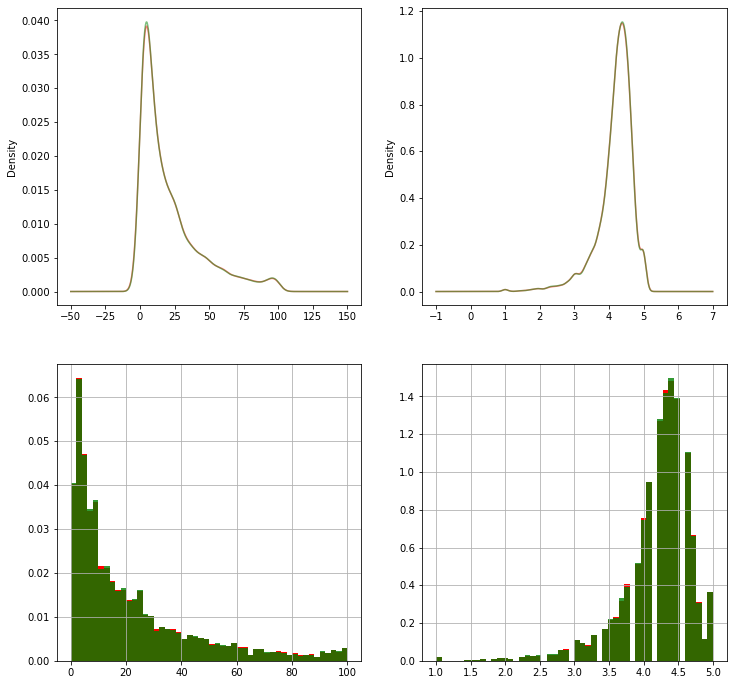

In [59]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

df['Size'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
df_random['Size'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')
df['Rating'].plot.density(color='red',ax=axs[0, 1],alpha=0.5,label='Rating')
df_random['Rating'].plot.density(color='green',ax=axs[0, 1],alpha=0.5,label='Rating')
df['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='red')
df_random['Size'].hist(bins=50,ax=axs[1, 0],density=True,figsize=(12,12),color='green', alpha=0.8)
df['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='red')
df_random['Rating'].hist(bins=50,ax=axs[1, 1],density=True,figsize=(12,12),color='green', alpha=0.8)

plt.show()

In [60]:
null_df = pd.DataFrame({'Null Values' : df_random.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_random.isna().sum().sort_values(ascending=False)) / (df_random.shape[0]) * (100)})
null_df

Null Values  Percentage Null Values
App                       0                     0.0
Category                  0                     0.0
Rating                    0                     0.0
Reviews                   0                     0.0
Size                      0                     0.0
Installs                  0                     0.0
Type                      0                     0.0
Price                     0                     0.0
Content Rating            0                     0.0
Genres                    0                     0.0
Last Updated              0                     0.0
Current Ver               0                     0.0
Android Ver               0                     0.0
day                       0                     0.0
month                     0                     0.0
year                      0                     0.0

#### Insights
-As we can observe from above plots
- Random Sample imputation Technique has no impact on distribution pattern.
- So we will accept Random Sample imputation Technique .

In [61]:
num_features=[col for col in df_random.columns if df_random[col].dtype!='O']
num_df = df_random[num_features]
num_df.head()

Rating  Reviews  Size  Installs  Price  day  month  year
0     4.1      159  19.0     10000    0.0    7      1  2018
1     3.9      967  14.0    500000    0.0   15      1  2018
2     4.7    87510   8.7   5000000    0.0    1      8  2018
3     4.5   215644  25.0  50000000    0.0    8      6  2018
4     4.3      967   2.8    100000    0.0   20      6  2018

In [62]:
df_random.to_csv('data/google_missing_imputed.csv', index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/google_missing_imputed.csv'